
# 1. 파일 업로드

In [1]:
from google.colab import files

uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from urllib.request import urlopen 
import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# 2. 데이터 불러오기

In [0]:
review = []
sentiment = []
sum_review = ''
f = open('/content/IMDB Dataset.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
  review.append(line[0])
  sentiment.append(line[1])
f.close()

del review[0]
del sentiment[0]

for line in review:
  sum_review = sum_review+line

# 3. Tokenize & Sentiment Analysis

In [13]:
sid = SentimentIntensityAnalyzer()
score_list = []
for content in review:
  lines_list = tokenize.sent_tokenize(content)
  sum = 0
  for sent in lines_list: 
    ss = sid.polarity_scores(sent)
    sum = sum+ss['compound']
  finalsum = str(sum/len(lines_list))
  score_list.append(finalsum)

print(score_list)

['-0.34016', '0.24705714285714286', '0.48895', '-0.2870666666666667', '0.2881888888888889', '0.39768333333333333', '0.9022', '0.11252222222222219', '-0.008542857142857161', '0.4383333333333333', '0.9482', '-0.01646666666666667', '0.0375', '0.21819999999999998', '0.28974', '-0.036287499999999986', '0.08735', '-0.28736875', '0.14493333333333333', '0.18245714285714287', '-0.09676666666666668', '-0.42031666666666667', '0.5031', '0.150875', '-0.08016', '0.03973333333333332', '0.2023083333333333', '0.0952', '-0.08358235294117647', '-0.20604705882352944', '-0.3453', '-0.038364705882352954', '-0.30888', '0.11512499999999999', '-0.176275', '-0.39788', '-0.23211818181818183', '0.28856666666666664', '0.22662142857142856', '0.021262500000000004', '0.4396285714285714', '-0.1217909090909091', '0.29200000000000004', '0.1943875', '0.5317', '0.39992500000000003', '-0.0744', '0.09387037037037038', '0.007899999999999982', '0.1372', '0.06699999999999999', '-0.263125', '0.11078000000000002', '-0.2552', '0.

# 4. 정확도

In [0]:
accuracy = 0
for i in range(len(score_list)):
  if (float)(score_list[i]) > 0:
    if sentiment[i] == 'positive':
      accuracy += 1
  else:
    if sentiment[i] == 'negative':
      accuracy += 1

In [7]:
print(accuracy/len(sentiment)*100)

70.33571486563287


# 5. 워드클라우드

In [0]:
def generate_wordcloud(text):
    wordcloud = WordCloud(font_path='/content/drive/My Drive/Colab Notebooks/NLP_Project/framd.ttf',#폰트 설정은 자기 디렉토리에 폰트를 설정해주세요!
     width=2400, height=1800,
     ranks_only=None,
     relative_scaling = 0.8,
     stopwords = set(STOPWORDS)
     ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

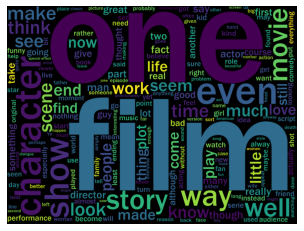

In [16]:
generate_wordcloud(sum_review)


etc. test codes

In [0]:
sid = SentimentIntensityAnalyzer()
score_list = []
for content in review:
  lines_list = tokenize.sent_tokenize(content)
  sum = 0
  for sent in lines_list: 
    ss = sid.polarity_scores(sent)
    sum = sum+ss['compound']
  finalsum = str(sum/len(lines_list))
  score_list.append(finalsum)

In [0]:
accuracy = 0
for i in range(len(score_list)):
  if (float)(score_list[i]) > 0.18115:
    if sentiment[i] == 'positive':
      accuracy += 1
  else:
    if sentiment[i] == 'negative':
      accuracy += 1

In [89]:
print(accuracy/len(sentiment)*100)

72.91142323617764


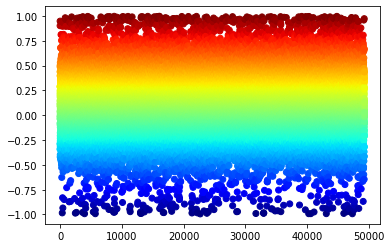

In [63]:
x_range = list(range(0,len(score_list)))
y_range = []
for i in range(len(score_list)):
  y_range.append((float)(score_list[i]))
plt.scatter(x_range,y_range, c=y_range, cmap='jet')
plt.show()

In [103]:
pos = 0
neg = 0
neu = 0
for i in range(len(y_range)):
  if y_range[i] >= 0.25:
    pos = pos +1
  elif y_range[i] <= -0.25:
    neg = neg+1
  else:
    neu = neu +1

print("Positive Review : ",pos)
print("Negative Review : ",neg)
print("Neutral Review : ",neu)

Positive Review :  14222
Negative Review :  3821
Neutral Review :  31225


In [102]:
wrong =0
neuAndRight = 0
neuAndWrong = 0
for i in range(len(y_range)):
  if y_range[i] >= 0.25:
    if sentiment[i] == 'negative':
      wrong = wrong +1
  elif y_range[i] <= -0.25:
    if sentiment[i] == 'positive':
      wrong = wrong +1
  else:
    if y_range[i]>0.18115:
      if sentiment[i] == 'positive':
        neuAndRight = neuAndRight + 1
      else:
        neuAndWrong = neuAndWrong +1
    else:
      if sentiment[i] == 'negative':
        neuAndRight = neuAndRight + 1
      else:
        neuAndWrong = neuAndWrong +1

print("totaly wrong : ", wrong)
print("Neutral by NTLK but Right : ", neuAndRight)
print("Neutral by NTLK but Wrong : ", neuAndWrong)

print("total wrongs : ",wrong+neuAndWrong)
print("Accuracy : ",(len(y_range)-(wrong+neuAndWrong))/len(y_range)*100)

totaly wrong :  2784
Neutral by NTLK but Right :  20663
Neutral by NTLK but Wrong :  10562
total wrongs :  13346
Accuracy :  72.91142323617764
